     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 11.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 11.4 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.svm import LinearSVC

In [19]:
session = "Pilot5"
data_dir = f"/Users/thenning/Documents/GitHub/neurobubbles/Data/{session}"
order_data = pd.read_csv((glob.glob(f"{data_dir}/orders*.csv"))[0])
round_data = pd.read_csv((glob.glob(f"{data_dir}/rounds*.csv"))[0])
payments_data = pd.read_csv((glob.glob(f"{data_dir}/payment*.csv"))[0])
prescreen_data = pd.read_csv((glob.glob(f"{data_dir}/prescreen*.csv"))[0])
pagetime_data = pd.read_csv((glob.glob(f"{data_dir}/PageTimes*.csv"))[0])


# Order Data

In [14]:
sell_orders = []
min_sell_price = []
buy_orders = []
max_buy_price = []
market_price = []
for round in np.unique(order_data['round_number']):
    if round > 3:
        df = order_data[order_data['round_number']== round]
        sell_orders.append(np.sum(df[df['type'] == 'SELL']['quantity']))
        min_sell_price.append(np.min(df[df['type'] == 'SELL']['price']))
        buy_orders.append(np.sum(df[df['type'] == 'BUY']['quantity']))
        max_buy_price.append(np.max(df[df['type'] == 'BUY']['price']))
        market_price.append(np.unique(df['market_price']))
    else:
        print("skipping practice round", round)

len(sell_orders)

skipping practice round 1
skipping practice round 2
skipping practice round 3


30

## Buy and Sell info

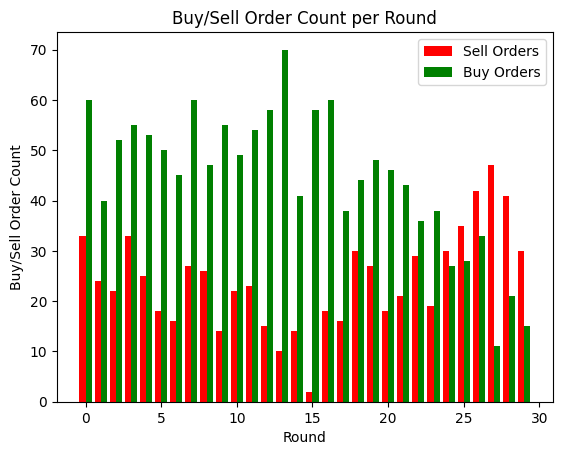

In [13]:
num_rounds = len(sell_orders)  # Assuming both sell_orders and buy_orders have the same length (number of rounds)
rounds = np.arange(num_rounds)


plt.bar(rounds - 0.2, sell_orders, width=0.4, label='Sell Orders', color='red')  # Shift bars to the left, color red
plt.bar(rounds + 0.2, buy_orders, width=0.4, label='Buy Orders', color='green')   # Shift bars to the right, color green
plt.xlabel('Round')
plt.ylabel('Buy/Sell Order Count')
plt.title('Buy/Sell Order Count per Round')
plt.legend()
plt.show()


In [36]:
def get_negative_inflection(buy_orders, sell_orders, hide_graph = "no"):
    buy_sell_diff = []
    for round,ask_count in enumerate(sell_orders):
        bid_count = buy_orders[round]
        if (ask_count > bid_count) and not (sell_orders[round-1] > buy_orders[round-1]):
            buy_sell_diff.append(1)
        else:
            buy_sell_diff.append(0)
    np.array(buy_sell_diff)

    if hide_graph == "yes":
        plt.plot(buy_sell_diff)
        plt.title(f"{session} Bid_Ask Change")
    
    return buy_sell_diff

buy_sell_diff = get_negative_inflection(buy_orders, sell_orders)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]